In [509]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

from imblearn.over_sampling import SMOTE 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [510]:
df1 = pd.read_excel("Laptop Dataset.xlsx")

df1.head().T

,0,1,2,3,4
Taken_product,0,0,0,0,1
Yearly_avg_view_on_travel_page,379.0,255.0,250.0,295.0,250.0
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64,59,84,48,80
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926
week_since_last_outstation_checkin,1,1,0,0,1


In [511]:
df1.shape

(1108, 16)

In [512]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,1108.0,0.249097,0.432686,0.0,0.00,0.0,0.00,1.0
Yearly_avg_view_on_travel_page,1108.0,282.115523,64.199977,138.0,237.00,270.5,325.00,455.5
total_likes_on_outstation_checkin_given,1108.0,27769.664260,13361.837042,3818.0,17650.25,26942.5,39380.25,52512.0
yearly_avg_Outstation_checkins,1108.0,9.277978,8.409913,1.0,2.00,7.0,15.00,29.0
member_in_family,1108.0,2.895307,1.044561,1.0,2.00,3.0,4.00,5.0
Yearly_avg_comment_on_travel_page,1108.0,77.496390,21.039323,33.0,60.00,77.0,95.00,125.0
total_likes_on_outofstation_checkin_received,1108.0,6130.675090,4105.791059,1098.0,2884.00,4759.5,7979.50,16572.0
week_since_last_outstation_checkin,1108.0,2.998195,2.493351,0.0,1.00,2.0,4.00,11.0
following_company_page,1108.0,0.310469,0.462895,0.0,0.00,0.0,1.00,1.0
montly_avg_comment_on_company_page,1108.0,26.391697,6.167198,14.0,22.00,26.0,31.00,42.0


In [513]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   int64  
 4   yearly_avg_Outstation_checkins                1108 non-null   int64  
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   object 
 7   Yearly_avg_comment_on_travel_page             1108 non-null   int64  
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64  
 9   week_since_last_outstation_checkin            1108 non-null   i

In [514]:
df1.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [515]:
df1c=df1.copy()
df1c

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776,8,1,Beach,64,5142,1,0,33,1,4,0,10
1,0,255.0,Laptop,48725,3,4,Beach,59,2913,1,1,19,0,3,0,8
2,0,250.0,Laptop,35184,2,2,Beach,84,3074,0,0,23,0,3,0,8
3,0,295.0,Laptop,7572,23,3,Beach,48,9532,0,0,33,1,2,0,10
4,1,250.0,Laptop,39379,16,1,Beach,80,3926,1,1,33,1,2,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0,278.0,Laptop,24127,4,2,Beach,115,5184,7,0,35,0,2,1,23
1104,1,388.0,Laptop,30775,1,4,Beach,109,6787,8,0,29,0,4,1,14
1105,0,268.0,Laptop,42010,18,4,Beach,98,5753,2,1,34,0,4,1,17
1106,0,279.0,Laptop,30987,23,2,Historical site,58,2616,4,0,36,0,3,0,23


In [516]:
df1c['preferred_location_type'].value_counts()

Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: preferred_location_type, dtype: int64

In [517]:
print('Feature: Preferred location type')
print(pd.Categorical(df1c['preferred_location_type'].unique()))
print(pd.Categorical(df1c['preferred_location_type'].unique()).codes)
df1c['preferred_location_type'] = pd.Categorical(df1c['preferred_location_type']).codes

Feature: Preferred location type
['Beach', 'Historical site', 'Big Cities', 'Trekking', 'Other', 'Hill Stations']
Categories (6, object): ['Beach', 'Big Cities', 'Hill Stations', 'Historical site', 'Other', 'Trekking']
[0 3 1 5 4 2]


In [518]:
df1c['preferred_location_type'].value_counts()

0    492
3    344
1    108
5     84
4     56
2     24
Name: preferred_location_type, dtype: int64

In [519]:
df_laptop = df1c.copy()

df_laptop.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776,8,1,0,64,5142,1,0,33,1,4,0,10
1,0,255.0,Laptop,48725,3,4,0,59,2913,1,1,19,0,3,0,8
2,0,250.0,Laptop,35184,2,2,0,84,3074,0,0,23,0,3,0,8
3,0,295.0,Laptop,7572,23,3,0,48,9532,0,0,33,1,2,0,10
4,1,250.0,Laptop,39379,16,1,0,80,3926,1,1,33,1,2,0,10


In [520]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   int64  
 4   yearly_avg_Outstation_checkins                1108 non-null   int64  
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   int8   
 7   Yearly_avg_comment_on_travel_page             1108 non-null   int64  
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64  
 9   week_since_last_outstation_checkin            1108 non-null   i

In [521]:
df_laptop.shape

(1108, 16)

In [522]:
from scipy.stats import zscore

In [523]:
df_laptop

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776,8,1,0,64,5142,1,0,33,1,4,0,10
1,0,255.0,Laptop,48725,3,4,0,59,2913,1,1,19,0,3,0,8
2,0,250.0,Laptop,35184,2,2,0,84,3074,0,0,23,0,3,0,8
3,0,295.0,Laptop,7572,23,3,0,48,9532,0,0,33,1,2,0,10
4,1,250.0,Laptop,39379,16,1,0,80,3926,1,1,33,1,2,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0,278.0,Laptop,24127,4,2,0,115,5184,7,0,35,0,2,1,23
1104,1,388.0,Laptop,30775,1,4,0,109,6787,8,0,29,0,4,1,14
1105,0,268.0,Laptop,42010,18,4,0,98,5753,2,1,34,0,4,1,17
1106,0,279.0,Laptop,30987,23,2,3,58,2616,4,0,36,0,3,0,23


In [524]:
df_laptop['preferred_device']=df_laptop['preferred_device'].replace({'Laptop':1})

In [525]:
df_laptop['preferred_device'].value_counts()

1    1108
Name: preferred_device, dtype: int64

In [526]:
X= df_laptop.drop(["Taken_product"],axis=1)

In [527]:
y=df_laptop.Taken_product

In [528]:
X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,379.0,1,9776,8,1,0,64,5142,1,0,33,1,4,0,10
1,255.0,1,48725,3,4,0,59,2913,1,1,19,0,3,0,8
2,250.0,1,35184,2,2,0,84,3074,0,0,23,0,3,0,8
3,295.0,1,7572,23,3,0,48,9532,0,0,33,1,2,0,10
4,250.0,1,39379,16,1,0,80,3926,1,1,33,1,2,0,10


In [529]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Taken_product, dtype: int64

In [530]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [531]:
X_train.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
667,328.0,1,20006,8,3,0,81,16572,2,0,26,0,2,0,33
737,281.0,1,21306,7,3,1,96,4691,3,0,35,0,4,0,21
820,246.0,1,26433,26,4,1,86,5685,3,1,32,0,3,0,17
385,365.0,1,25177,27,2,0,85,6404,4,1,24,0,4,0,8
785,370.0,1,24832,7,2,3,113,2718,4,1,23,0,3,1,26


In [532]:
y_train.head()

667    0
737    0
820    1
385    1
785    1
Name: Taken_product, dtype: int64

In [533]:
X_test.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
304,245.0,1,24120,9,2,3,47,4675,0,0,20,0,4,1,9
1072,297.0,1,20838,2,2,3,95,2538,5,0,22,0,2,0,16
126,202.0,1,44910,1,3,3,57,4304,1,0,24,0,2,0,7
976,267.0,1,21684,3,1,0,53,7818,1,0,26,0,3,0,14
236,239.0,1,5714,24,1,5,40,5245,2,0,30,1,4,0,9


In [534]:
y_test.head()

304     0
1072    0
126     0
976     0
236     0
Name: Taken_product, dtype: int64

In [535]:
X_train.shape

(775, 15)

In [536]:
y_train.shape

(775,)

In [537]:
X_test.shape

(333, 15)

In [539]:
y_test.shape

(333,)

### CART

In [559]:
from sklearn.tree import DecisionTreeClassifier #from scikit Learn

In [560]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [561]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [562]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [563]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.210679
total_likes_on_outstation_checkin_given       0.157230
total_likes_on_outofstation_checkin_received  0.150109
Yearly_avg_comment_on_travel_page             0.086972
yearly_avg_Outstation_checkins                0.084508
following_company_page                        0.059435
week_since_last_outstation_checkin            0.054322
Daily_Avg_mins_spend_on_traveling_page        0.050265
working_flag                                  0.043323
travelling_network_rating                     0.043006
montly_avg_comment_on_company_page            0.023914
preferred_location_type                       0.023266
member_in_family                              0.012290
Adult_flag                                    0.000683
preferred_device                              0.000000


In [564]:
y_predict = dt_model.predict(X_test)

In [565]:
y_predict.shape

(333,)

In [566]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [567]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [568]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [569]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [570]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


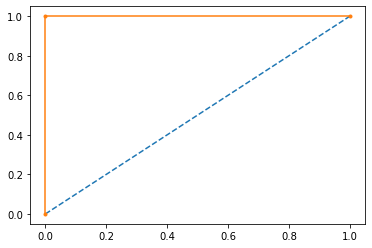

In [571]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.880


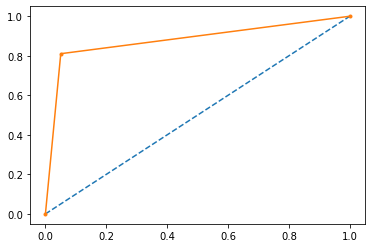

In [572]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [573]:
from sklearn.metrics import classification_report,confusion_matrix

In [574]:
confusion_matrix(y_train, ytrain_predict)

array([[594,   0],
       [  0, 181]])

In [576]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

1.0

In [578]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [579]:
confusion_matrix(y_test, ytest_predict)

array([[226,  12],
       [ 18,  77]])

In [580]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9099099099099099

In [582]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       238
           1       0.87      0.81      0.84        95

    accuracy                           0.91       333
   macro avg       0.90      0.88      0.89       333
weighted avg       0.91      0.91      0.91       333



#### Tuning

In [583]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [584]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [585]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.392451
total_likes_on_outofstation_checkin_received  0.292289
following_company_page                        0.157448
yearly_avg_Outstation_checkins                0.095914
member_in_family                              0.027941
total_likes_on_outstation_checkin_given       0.025798
Yearly_avg_comment_on_travel_page             0.008159
preferred_device                              0.000000
preferred_location_type                       0.000000
week_since_last_outstation_checkin            0.000000
montly_avg_comment_on_company_page            0.000000
working_flag                                  0.000000
travelling_network_rating                     0.000000
Adult_flag                                    0.000000
Daily_Avg_mins_spend_on_traveling_page        0.000000


In [586]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [587]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [588]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [589]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [590]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


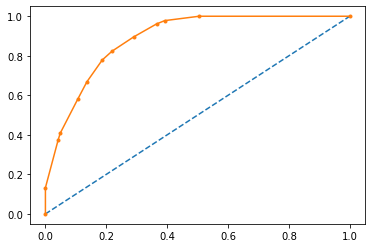

In [591]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.881


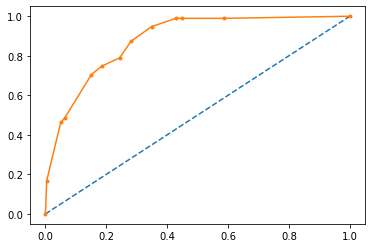

In [592]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [593]:
from sklearn.metrics import classification_report,confusion_matrix

In [595]:
confusion_matrix(y_train, ytrain_predict)

array([[565,  29],
       [107,  74]])

In [597]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [599]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



In [601]:
confusion_matrix(y_test, ytest_predict)

array([[223,  15],
       [ 49,  46]])

In [603]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [605]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



#### SMOTE

In [606]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [607]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 15)

In [608]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [609]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [610]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [611]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [612]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [613]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


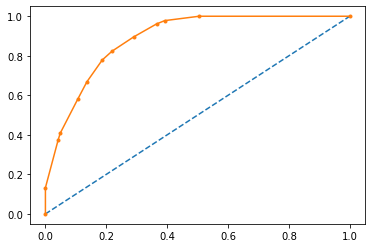

In [614]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.881


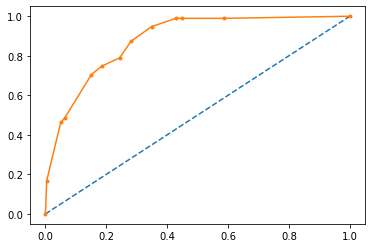

In [615]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [616]:
from sklearn.metrics import classification_report,confusion_matrix

In [617]:
confusion_matrix(y_train, ytrain_predict)

array([[565,  29],
       [107,  74]])

In [618]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [619]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



In [620]:
confusion_matrix(y_test, ytest_predict)

array([[223,  15],
       [ 49,  46]])

In [621]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [622]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



 ### Logistic Regression


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [76]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)

In [78]:
log_model.score(X_train,y_train)

0.7948387096774193

In [79]:
log_model.score(X_test,y_test)

0.7477477477477478

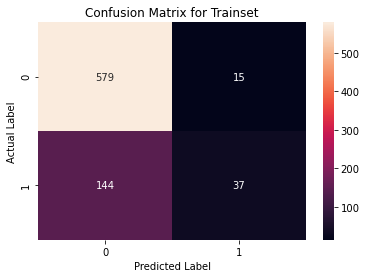

In [96]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [97]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       594
           1       0.71      0.20      0.32       181

    accuracy                           0.79       775
   macro avg       0.76      0.59      0.60       775
weighted avg       0.78      0.79      0.75       775



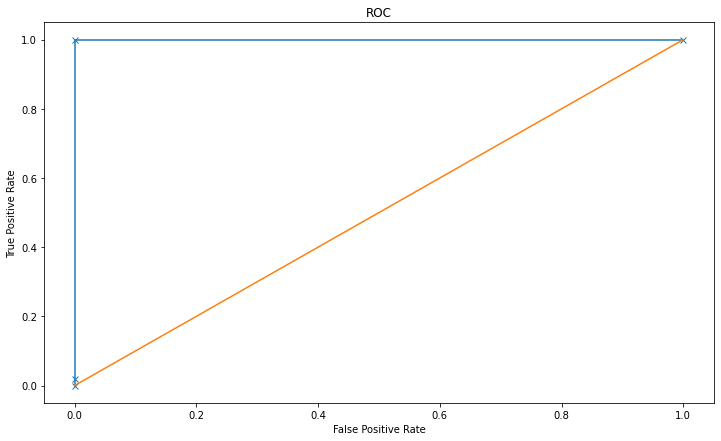

Area under Curve is 1.0


In [98]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

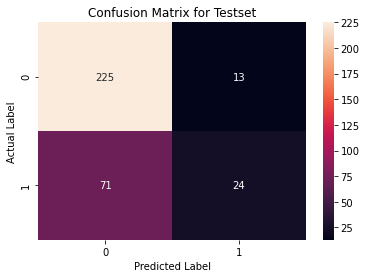

In [99]:
#Confusion Matrix for Train set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [100]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       238
           1       0.65      0.25      0.36        95

    accuracy                           0.75       333
   macro avg       0.70      0.60      0.60       333
weighted avg       0.73      0.75      0.71       333



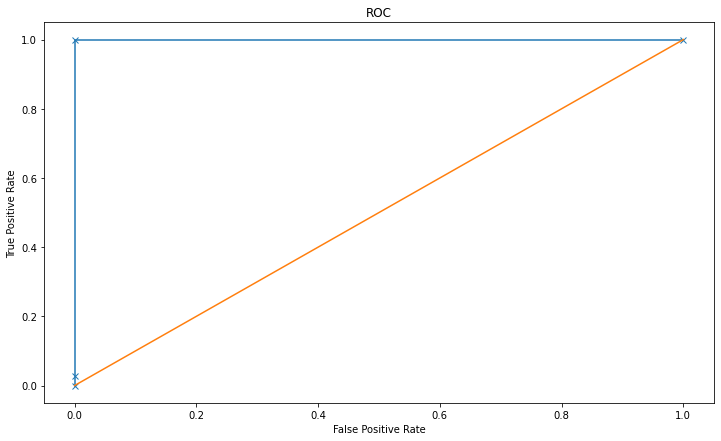

Area under Curve is 1.0


In [101]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [150]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [151]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')

In [152]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [153]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(solver='liblinear', tol=1e-05)


In [154]:
best_model1 = grid_search1.best_estimator_

In [155]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

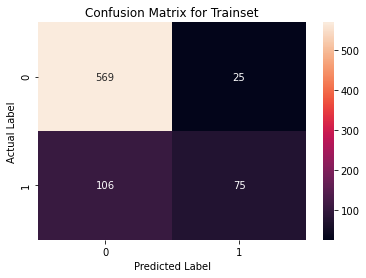

In [156]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [157]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       594
           1       0.75      0.41      0.53       181

    accuracy                           0.83       775
   macro avg       0.80      0.69      0.72       775
weighted avg       0.82      0.83      0.81       775



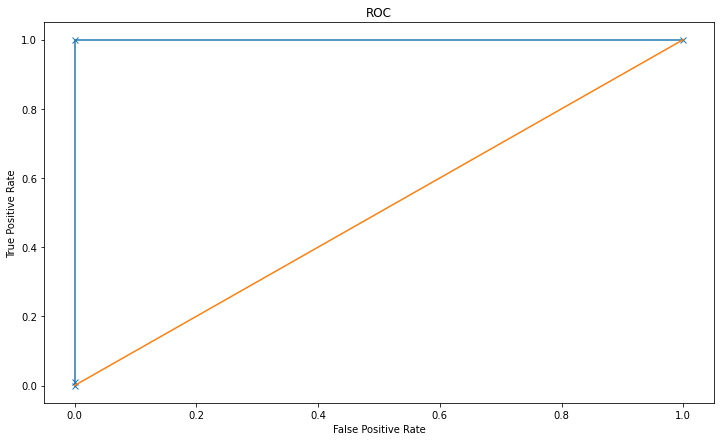

Area under Curve is 1.0


In [158]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

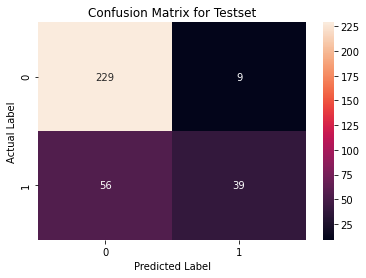

In [159]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [160]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       238
           1       0.81      0.41      0.55        95

    accuracy                           0.80       333
   macro avg       0.81      0.69      0.71       333
weighted avg       0.81      0.80      0.78       333



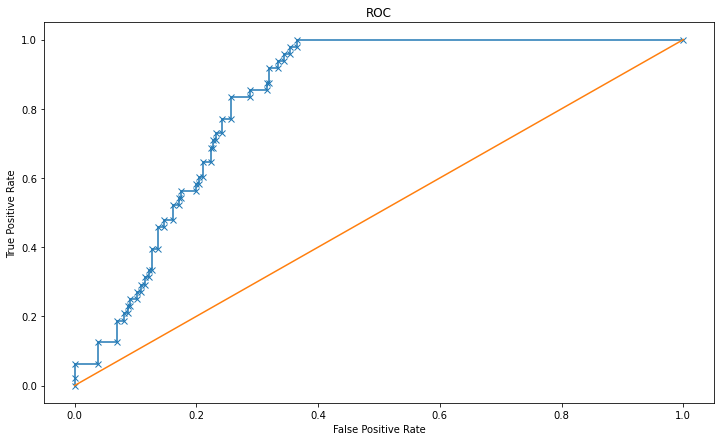

Area under Curve is 0.8277777777777777


In [161]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00432
Feature: 1, Score: -0.00670
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.05264
Feature: 4, Score: 0.00134
Feature: 5, Score: -0.10861
Feature: 6, Score: 0.01410
Feature: 7, Score: -0.00013
Feature: 8, Score: 0.19914
Feature: 9, Score: 1.50029
Feature: 10, Score: 0.02048
Feature: 11, Score: -0.10358
Feature: 12, Score: -0.31731
Feature: 13, Score: -0.11384
Feature: 14, Score: -0.07678


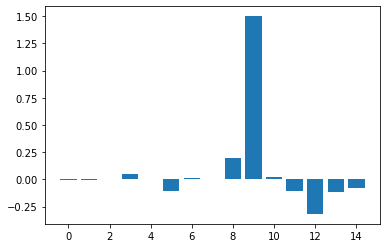

In [162]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Linear Discriminant Analysis

In [80]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [81]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [82]:
lda_model.score(X_train,y_train)

0.8167741935483871

In [83]:
lda_model.score(X_test,y_test)

0.8048048048048048

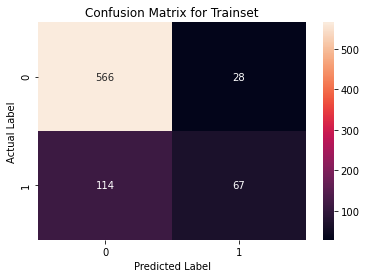

In [102]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [103]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       594
           1       0.71      0.37      0.49       181

    accuracy                           0.82       775
   macro avg       0.77      0.66      0.69       775
weighted avg       0.80      0.82      0.79       775



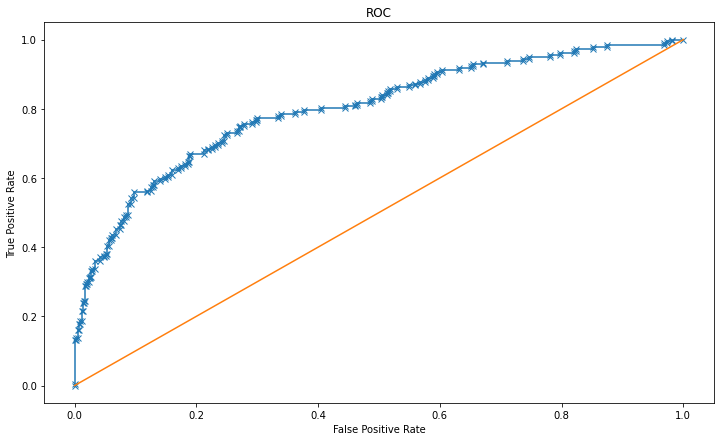

Area under Curve is 0.7991331361497107


In [104]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

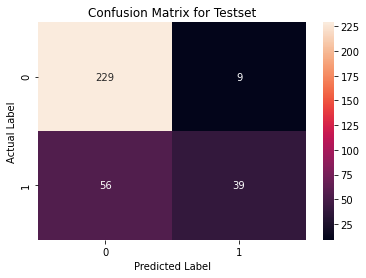

In [105]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [106]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       238
           1       0.81      0.41      0.55        95

    accuracy                           0.80       333
   macro avg       0.81      0.69      0.71       333
weighted avg       0.81      0.80      0.78       333



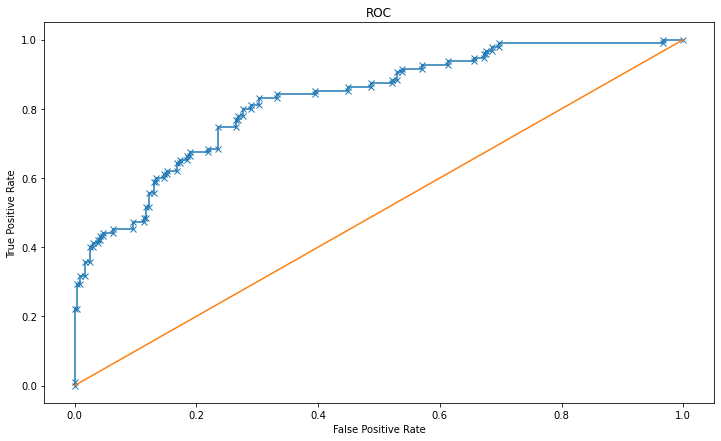

Area under Curve is 0.8264927023440954


In [107]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [163]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}

In [164]:
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [165]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [166]:
lda_model.score(X_test,y_test)

0.8048048048048048

In [167]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [168]:
best_model2 = grid_search2.best_estimator_

In [169]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

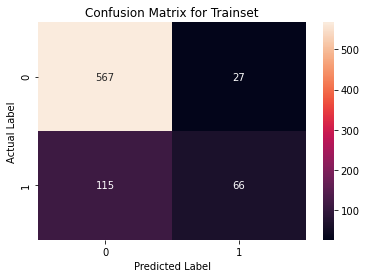

In [170]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [171]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       594
           1       0.71      0.36      0.48       181

    accuracy                           0.82       775
   macro avg       0.77      0.66      0.69       775
weighted avg       0.80      0.82      0.79       775



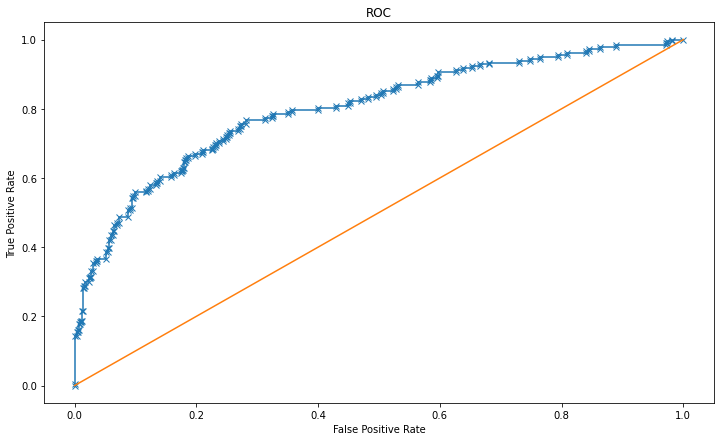

Area under Curve is 0.7994214706921889


In [172]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_model2.predict_proba(X_train)[:,1]))

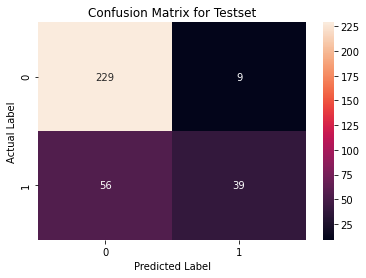

In [173]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [174]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       238
           1       0.81      0.41      0.55        95

    accuracy                           0.80       333
   macro avg       0.81      0.69      0.71       333
weighted avg       0.81      0.80      0.78       333



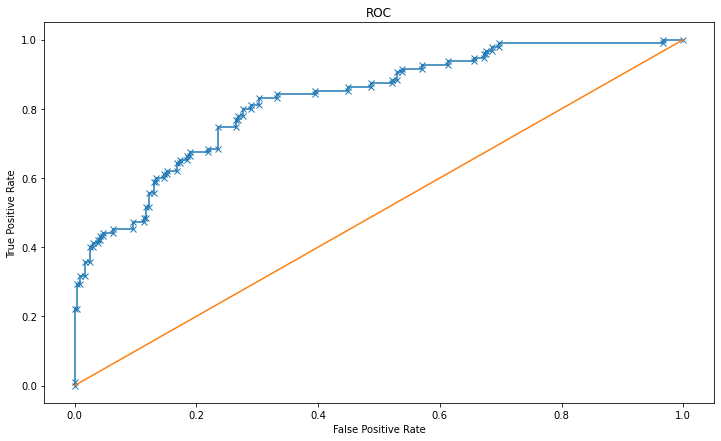

Area under Curve is 0.8264927023440954


In [175]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00435
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.04493
Feature: 4, Score: -0.01770
Feature: 5, Score: -0.10604
Feature: 6, Score: 0.01241
Feature: 7, Score: -0.00011
Feature: 8, Score: 0.18326
Feature: 9, Score: 1.72181
Feature: 10, Score: 0.02008
Feature: 11, Score: -0.01746
Feature: 12, Score: -0.26658
Feature: 13, Score: -0.30463
Feature: 14, Score: -0.06291


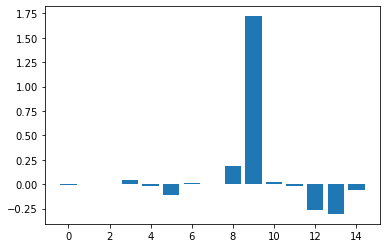

In [176]:
# get importance
importance = best_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

 ###  Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)

In [85]:
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [86]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)


0.9669669669669669


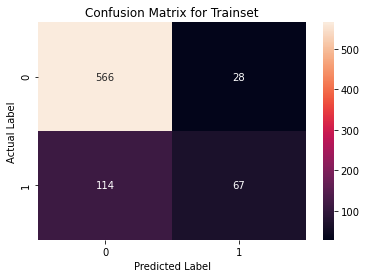

In [108]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [109]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



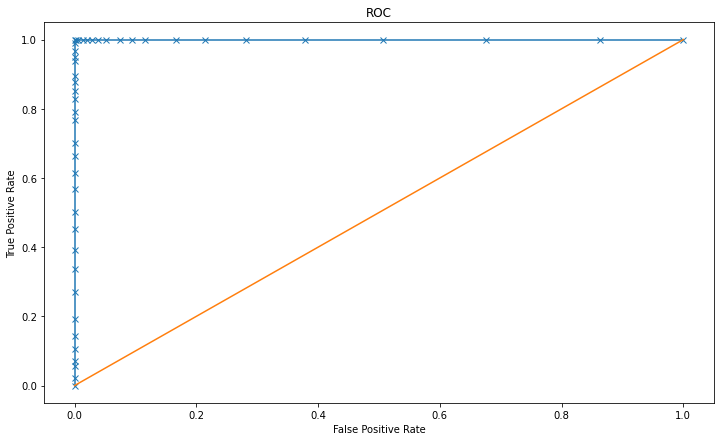

Area under Curve is 1.0


In [110]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

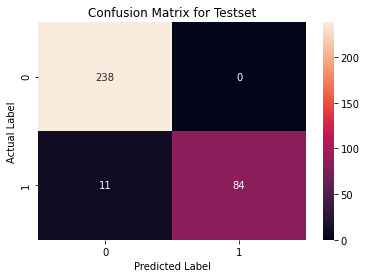

In [111]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [112]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       1.00      0.88      0.94        95

    accuracy                           0.97       333
   macro avg       0.98      0.94      0.96       333
weighted avg       0.97      0.97      0.97       333



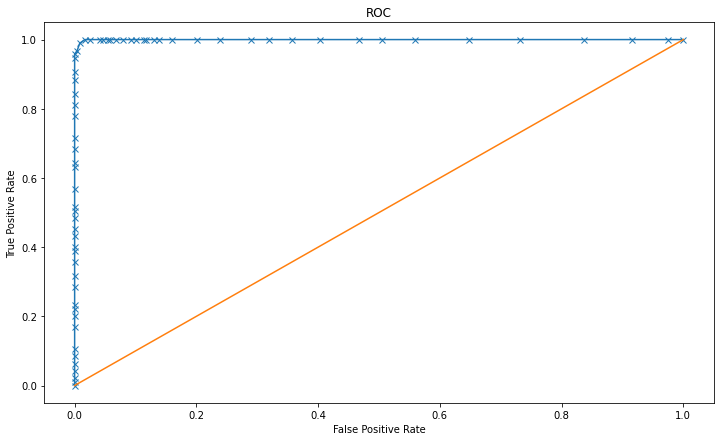

Area under Curve is 0.9997125165855815


In [113]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [126]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [127]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9669669669669669


### RF using grid search

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [130]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [131]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [132]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [133]:
best_grid = rf_random.best_estimator_

In [134]:
best_grid

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400)

In [135]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

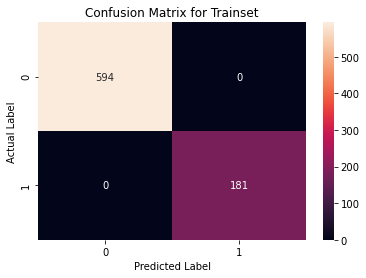

In [136]:
#Confusion Matrix for Test set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [137]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



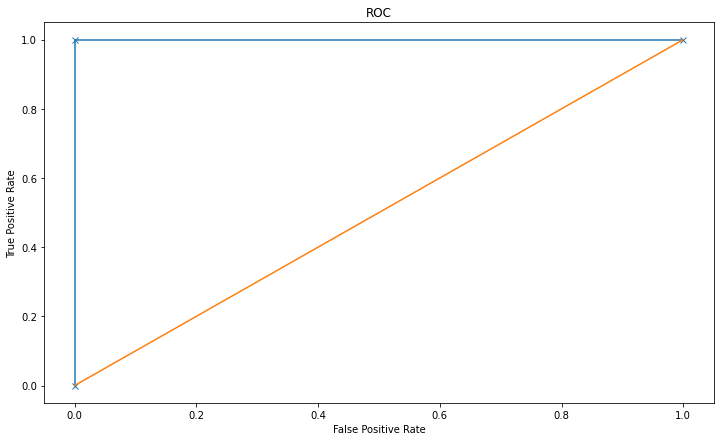

Area under Curve is 1.0


In [138]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

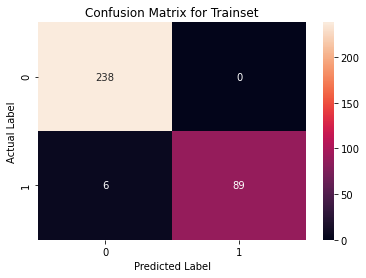

In [139]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [140]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



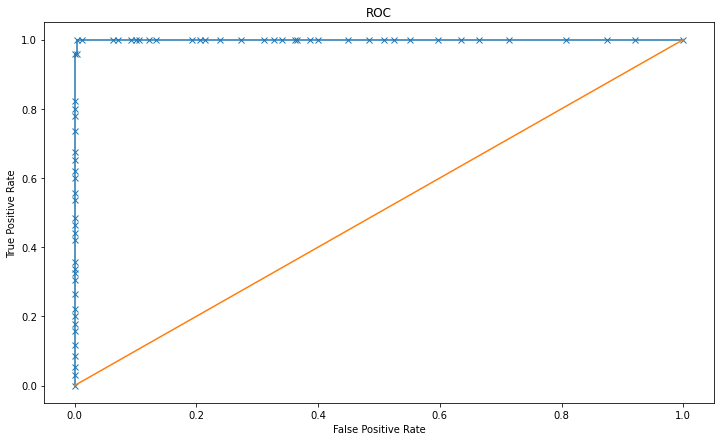

Area under Curve is 0.9998230871295887


In [141]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.16721
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.13371
Feature: 3, Score: 0.10159
Feature: 4, Score: 0.04066
Feature: 5, Score: 0.04581
Feature: 6, Score: 0.06683
Feature: 7, Score: 0.16377
Feature: 8, Score: 0.04865
Feature: 9, Score: 0.05470
Feature: 10, Score: 0.03511
Feature: 11, Score: 0.01508
Feature: 12, Score: 0.04360
Feature: 13, Score: 0.01443
Feature: 14, Score: 0.06886


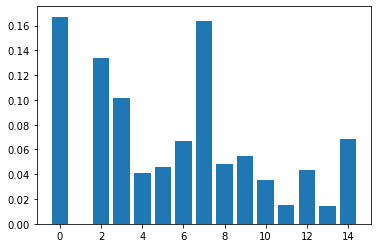

In [142]:
# get importance
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier


In [88]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[1.0,
 0.954954954954955,
 0.8558558558558559,
 0.7867867867867868,
 0.7687687687687688,
 0.7327327327327328,
 0.7297297297297297,
 0.7357357357357357,
 0.7447447447447447,
 0.7507507507507507]

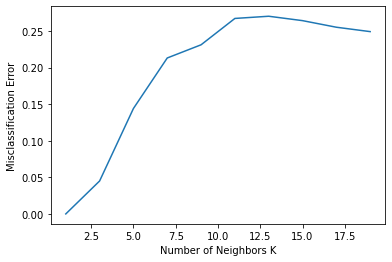

In [89]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### By scree plot we see 3 is optimum number of k neighbours with accordance MCE

##### Therefore, building the KNN model with k=3

In [90]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)


In [91]:
KNN_model.score(X_train,y_train)

0.9935483870967742

In [92]:
KNN_model.score(X_test,y_test)

0.954954954954955

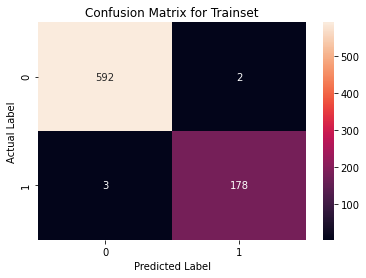

In [114]:
#Confusion Matrix for Train set
confusion_matrix(y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [115]:
print(classification_report(y_train,KNN_train_predict)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       0.99      0.98      0.99       181

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



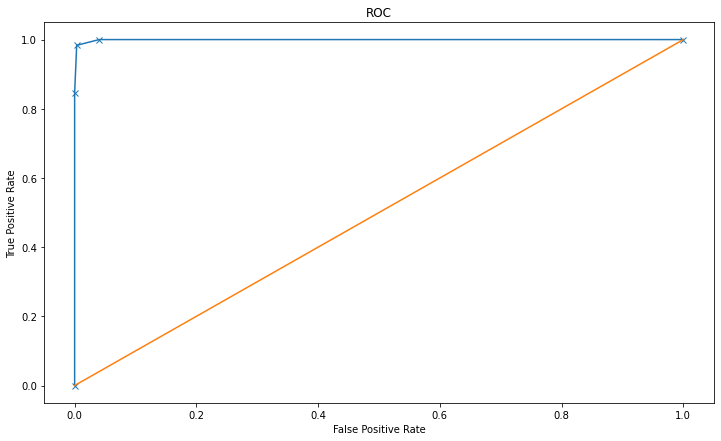

Area under Curve is 0.9994047286864967


In [116]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

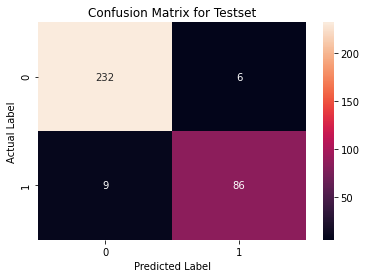

In [117]:
#Confusion Matrix for Train set
confusion_matrix(y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [118]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       238
           1       0.93      0.91      0.92        95

    accuracy                           0.95       333
   macro avg       0.95      0.94      0.94       333
weighted avg       0.95      0.95      0.95       333



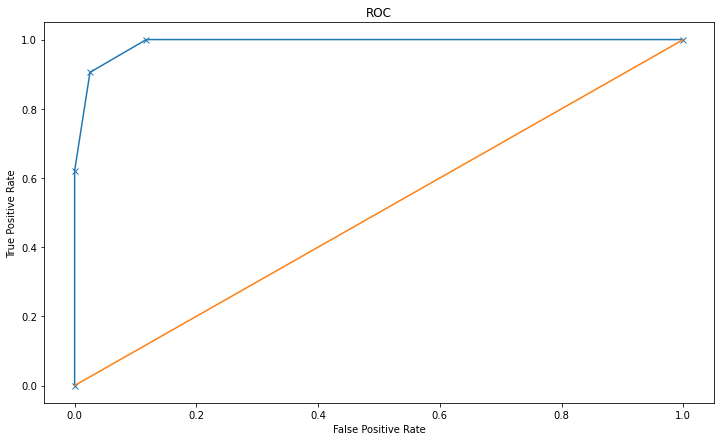

Area under Curve is 0.9896505970809376


In [119]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

### SMOTE

In [177]:
from imblearn.over_sampling import SMOTE 
from sklearn import metrics


In [178]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [179]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 15)

###  LOGIT

In [180]:
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [181]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)

In [182]:
## Performance Matrix on train data set with SMOTE
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.6725589225589226
[[387 207]
 [182 412]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       594
           1       0.67      0.69      0.68       594

    accuracy                           0.67      1188
   macro avg       0.67      0.67      0.67      1188
weighted avg       0.67      0.67      0.67      1188



In [183]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.6726726726726727
[[151  87]
 [ 22  73]]
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       238
           1       0.46      0.77      0.57        95

    accuracy                           0.67       333
   macro avg       0.66      0.70      0.65       333
weighted avg       0.75      0.67      0.69       333



###   LDA

In [184]:


smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [185]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)

In [186]:
## Performance Matrix on train data set with SMOTE
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.6725589225589226
[[442 152]
 [152 442]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       594
           1       0.74      0.74      0.74       594

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



In [187]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.7357357357357357
[[173  65]
 [ 23  72]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       238
           1       0.53      0.76      0.62        95

    accuracy                           0.74       333
   macro avg       0.70      0.74      0.71       333
weighted avg       0.78      0.74      0.75       333



###  KNN

In [188]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [189]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)

In [190]:
## Performance Matrix on train data set with SMOTE
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9856902356902357
[[591   3]
 [ 14 580]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       594
           1       0.99      0.98      0.99       594

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188



In [191]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.975975975975976
[[230   8]
 [  0  95]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       238
           1       0.92      1.00      0.96        95

    accuracy                           0.98       333
   macro avg       0.96      0.98      0.97       333
weighted avg       0.98      0.98      0.98       333



###  RF


In [192]:
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)

In [193]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)

In [194]:
## Performance Matrix on train data set with SMOTE
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[594   0]
 [  0 594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [195]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.9819819819819819
[[235   3]
 [  3  92]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       238
           1       0.97      0.97      0.97        95

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333

